## Random Sampling and Sample Bias
<pre>
A sample is a subset of data from a larger dataset.
Random sampling is a process in which each available 
observation of population to be sampled has an equal
chance of being chosen for the sample at each draw. 
Thus simple random sample.
Sampling is of two types: 
<ol>
<li>Sampling with replacement</li>
<li>Sampling without replacement</li>
</ol>
Sample bias is reffered as the systematic error occured during sampling. 
Eg: If the sample is not randomly selected then the
 sample results are prone to error due to bias.
</pre>

## Sampling Distribution of a Statistic
<pre>
Sampling distribution of a statistic refers to the distribution of some sample statistic over many
samples drawn from the same population.
We are mostly concerned with making inferences from 
(small) samples to (very large )population.
</pre>

In [2]:
import pandas as pd 
import seaborn as sns

In [3]:
sns.set_style("whitegrid")

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
loans_income = pd.read_csv("data/loans_income.csv")
loans_income.sample(5)

,x
29060,33000
1158,61235
20664,51000
8640,150000
40303,61880


In [7]:
(["chirayu" ]* 10)

['chirayu',
 'chirayu',
 'chirayu',
 'chirayu',
 'chirayu',
 'chirayu',
 'chirayu',
 'chirayu',
 'chirayu',
 'chirayu']

In [8]:
loans_income.squeeze().sample(5).values

array([ 46000,  70000,  37000, 145000,  52000], dtype=int64)

In [9]:
index = pd.Index(range(1000))
sample_data = pd.DataFrame({
    "income": loans_income.squeeze().sample(1000).values, 
    "type": ["Individual data observations"]* 1000
} , index= index)
sample_mean_5 = pd.DataFrame({
    "income": [loans_income.squeeze().sample(5).values.mean() for _ in range(1000)],
    "type": ["Mean of 5 sample size"] * 1000
} , index = index)
sample_mean_20 = pd.DataFrame({
    "income": [loans_income.squeeze().sample(20).values.mean() for _ in range(1000)] , 
    "type": ["Mean of 20 sample size"] * 1000
} , index = index)
results = pd.concat([sample_data , sample_mean_5 , sample_mean_20])
results.head(5)

,income,type
0,38000.0,Individual data observations
1,19200.0,Individual data observations
2,56000.0,Individual data observations
3,25688.0,Individual data observations
4,80000.0,Individual data observations


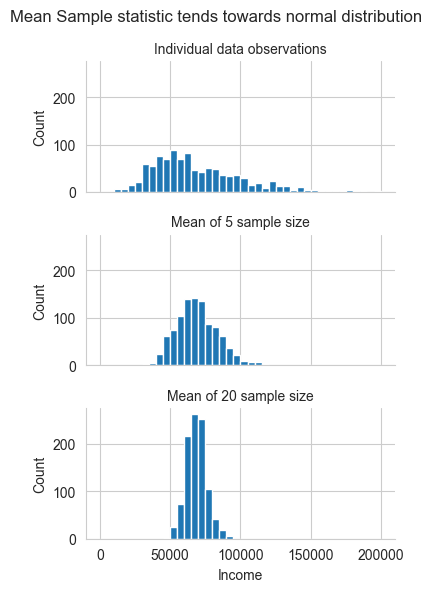

In [10]:
g = sns.FacetGrid(results , col = "type"  , col_wrap=1 , height= 2 , 
                  aspect = 2 )
g.map(plt.hist, "income" , range= [0 , 200000] , bins = 40)
g.set_axis_labels("Income" , "Count")
g.set_titles("{col_name}")
plt.suptitle("Mean Sample statistic tends towards normal distribution ")
plt.tight_layout()

## Central limit theorem
<pre>
In above figure, the sample statistic will tend to follow normal distribution although the population is not normal.
This phenomenon is called central limit theorem.
</pre>

## Standard Error
<pre>
The variability in the sampling distribution for a statistic.
Can be calculated using standard deviation s of the sample values and sample size n:
</pre>
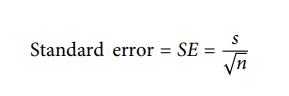


## Bootstrap


<pre>
A way to estimate the sampling distribution of a statistic, or of a model parameters, is to draw additional samples, with replacement from the sample itself and calculate the statistic or model parameter for each resample.This is called bootstrap</pre>

In [11]:
from sklearn.utils import resample

In [12]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print(f"Bootstrap Statistics")
print(f"Original: {loans_income.median()}")
print(f"bias: {results.mean() - loans_income.median()}")
print(f"std. error: {results.std()}")

Bootstrap Statistics
Original: x    62000.0
dtype: float64
bias: x   -55.854
dtype: float64
std. error: 187.18727991442626


<Axes: xlabel='x', ylabel='Count'>

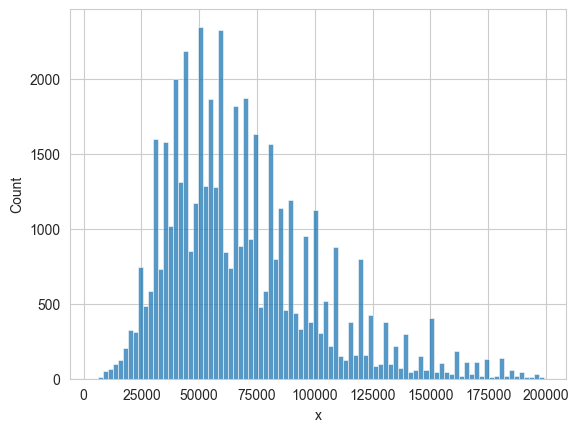

In [13]:
sns.histplot(x = "x" , data = loans_income)

## Confidence Intervals
<pre>
Range of value where the population parameter has highest probability to be within. 
</pre>

## Normal Distribution
<pre>The iconic bell shaped curve.</pre>

In [14]:
from scipy import stats

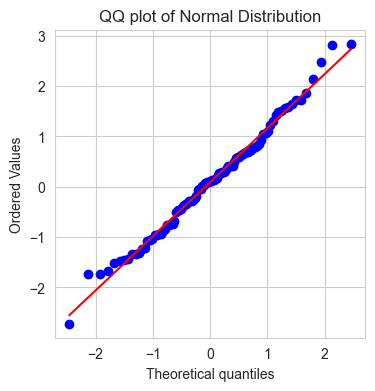

In [15]:
fig , ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size =100)
stats.probplot(norm_sample , plot = ax)
plt.title("QQ plot of Normal Distribution")
plt.show()

## Binomial Distribution

<Axes: ylabel='Count'>

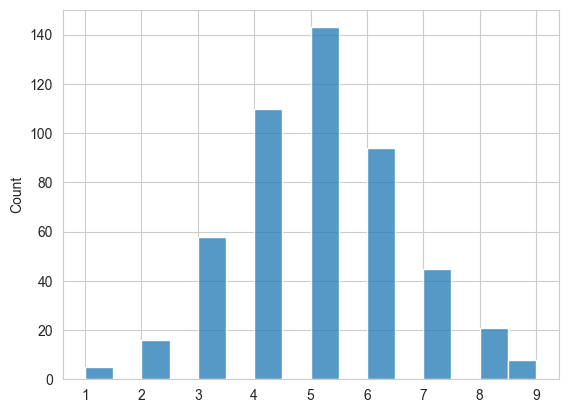

In [16]:
sns.histplot(np.random.binomial(n = 10 , p = 0.5  , size = 500))

In [17]:
print(stats.binom.pmf(2 , n = 5 , p = 0.1))
print(stats.binom.cdf(k = 2 , n = 5 ,p = 0.1))

0.07289999999999992
0.99144


## Poisson Distribution

In [65]:
mu = 3 #Lambda 
mean , var , skew , kurt = stats.poisson.stats(mu , moments = "mvsk")

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
       5.2, 5.4, 5.6, 5.8])

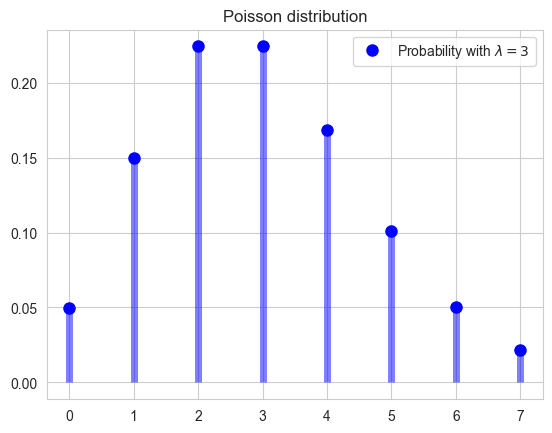

In [70]:
fig , ax = plt.subplots(1,1)
x = np.arange(stats.poisson.ppf(0.01, mu),
              stats.poisson.ppf(0.99, mu) )
ax.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label=rf'Probability with $\lambda = {mu}$ ')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.legend()
plt.title("Poisson distribution")
plt.show()

## Exponential Distribution

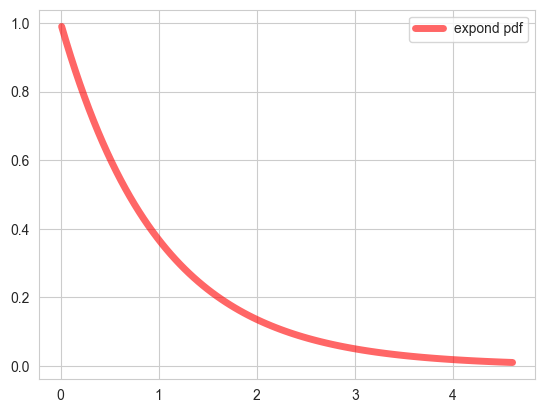

In [73]:
fig , ax = plt.subplots(1,1)
x = np.linspace(stats.expon.ppf(0.01) , 
                stats.expon.ppf(0.99) , 100)
ax.plot(x , stats.expon.pdf(x) , 
        "r-" , lw = 5 , alpha = 0.6 , label = "expon pdf")
plt.legend()